ABP FINAL: Predicción de ataques cardíacos con un modelo de clasificación Logístico.

### Dataset trabajado

El conjunto de datos fue recolectado en el **hospital Zheen**, ubicado en **Erbil, Irak**, durante el período comprendido entre **enero y mayo de 2019**.  
La base fue publicada por **Rashid, Tarik A. y Hassan, Bryar (2022)** bajo el nombre *“Heart Attack Dataset”* en Mendeley Data (DOI: [10.17632/wmhctcrt5v.1](https://doi.org/10.17632/wmhctcrt5v.1)) y pertenece al área de **Medicina – Enfermedades cardíacas**.

El propósito de este dataset es **clasificar pacientes con diagnóstico positivo o negativo de ataque cardíaco** a partir de parámetros fisiológicos y bioquímicos medidos en hospital.


### Composición

El dataset posee **9 variables** (columnas) y se organiza de la siguiente manera:

| Variable | Tipo | Descripción | Valores esperados / Normalización |
|-----------|------|-------------|-----------------------------------|
| **Age** | Numérica | Edad del paciente (años) | En adultos: 20–80 años |
| **Gender** | Binaria | Sexo biológico del paciente | 1 = masculino, 0 = femenino |
| **Heart Rate** | Numérica | Frecuencia cardíaca (latidos por minuto) | Normal: 60–100 lpm |
| **Systolic Blood Pressure** | Numérica | Presión arterial sistólica (mmHg) | Normal: 90–120 mmHg |
| **Diastolic Blood Pressure** | Numérica | Presión arterial diastólica (mmHg) | Normal: 60–80 mmHg |
| **Blood Sugar** | Binaria | Nivel de glucosa en sangre | 1 = >120 mg/dL (elevado), 0 = ≤120 (normal) |
| **CK-MB** | Numérica | Enzima cardíaca liberada por daño muscular | Normal: <5 ng/mL |
| **Troponin** | Numérica | Proteína cardíaca específica ante lesión miocárdica | Normal: <0.04 ng/mL |
| **Result** | Binaria | Diagnóstico final | 1 = Positivo (ataque cardíaco), 0 = Negativo |

### Consideraciones clínicas

- **CK-MB** y **Troponin** son marcadores bioquímicos clave que reflejan daño en el músculo cardíaco.  
- **Presión arterial**, **frecuencia cardíaca** y **glucosa** son indicadores de riesgo cardiovascular.  
- **Edad** y **género** permiten contextualizar los valores dentro de rangos fisiológicos esperables.  

### Objetivo del análisis

El objetivo del presente trabajo es **realizar un modelo de Regresión Logística Binaria** que permita **predecir la probabilidad de diagnóstico positivo (ataque cardíaco)** a partir de las variables clínicas mencionadas.  
Se busca identificar cuáles de ellas influyen significativamente en el resultado, analizando su efecto en términos de **odds ratio** y **significancia estadística**.


## 1. Análisis exploratorio de los datos (EDA)

Antes de aplicar la regresión logística, se realiza un **análisis exploratorio de los datos (EDA)** para comprender la distribución de las variables, sus rangos, relaciones y posibles valores atípicos.  
Este paso es esencial para validar la calidad de los datos y justificar qué variables serán consideradas en el modelo predictivo.

### 1.1 Inspección general del dataset
Se verifican la cantidad de registros, los tipos de datos de cada columna y la existencia de valores faltantes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("/content/Medicaldataset.csv")

# Información general
print("Filas:", df.shape[0], " | Columnas:", df.shape[1])
print("\nTipos de datos:")
print(df.dtypes)

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isna().sum())

# Vista previa
df.head()


Filas: 1319  | Columnas: 9

Tipos de datos:
Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

Valores faltantes por columna:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


### 1.2 Estadísticos descriptivos y distribución de variables

A continuación se observan los valores medios, mínimos y máximos de cada variable numérica, lo que permite analizar el comportamiento general de la muestra y los rangos fisiológicos de cada parámetro.


In [ ]:
# Estadísticos descriptivos
df.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Age,1319.0,56.19,13.65,14.00,47.00,58.00,65.00,103.0
Gender,1319.0,0.66,0.47,0.00,0.00,1.00,1.00,1.0
Heart rate,1319.0,78.34,51.63,20.00,64.00,74.00,85.00,1111.0
Systolic blood pressure,1319.0,127.17,26.12,42.00,110.00,124.00,143.00,223.0
Diastolic blood pressure,1319.0,72.27,14.03,38.00,62.00,72.00,81.00,154.0
Blood sugar,1319.0,146.63,74.92,35.00,98.00,116.00,169.50,541.0
CK-MB,1319.0,15.27,46.33,0.32,1.65,2.85,5.80,300.0
Troponin,1319.0,0.36,1.15,0.00,0.01,0.01,0.09,10.3


### Identificación de celdas con valores anormales

In [ ]:
df[df["Heart rate"] > 300]

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


### Reemplazo de valores anormales con valor de la media

In [ ]:
median_hr = df.loc[df["Heart rate"] < 300, "Heart rate"].median()
df.loc[df["Heart rate"] > 300, "Heart rate"] = median_hr
df.loc[[63, 717, 1069], ["Heart rate"]]

,Heart rate
63,74
717,74
1069,74


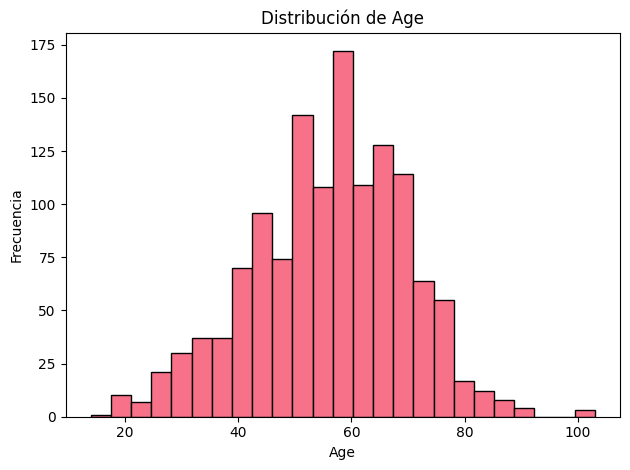

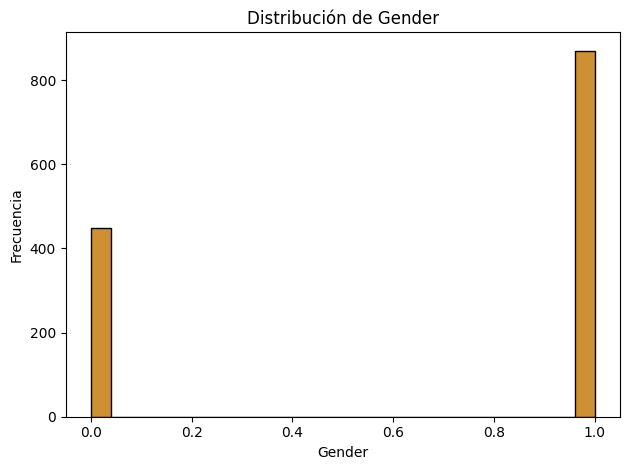

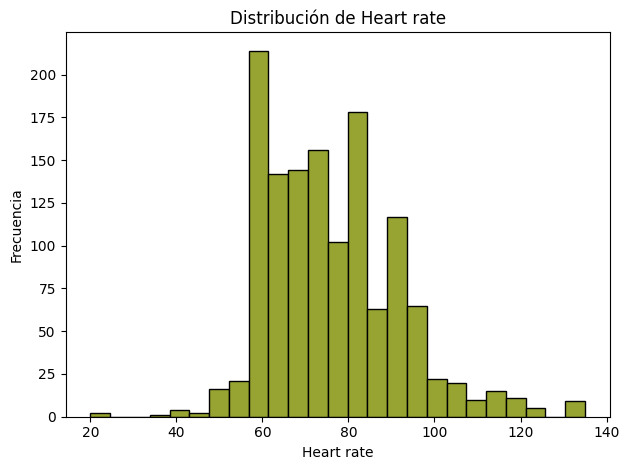

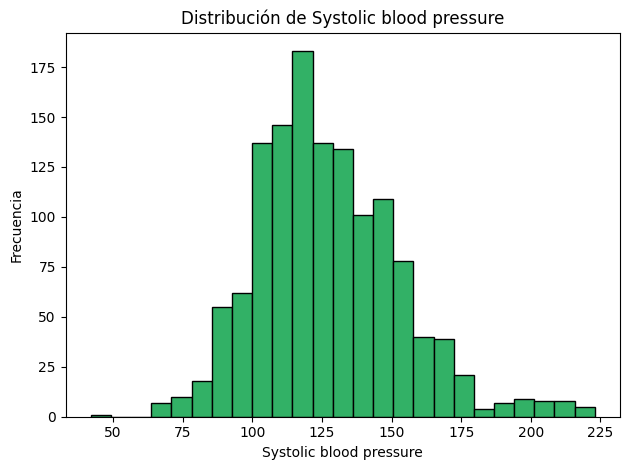

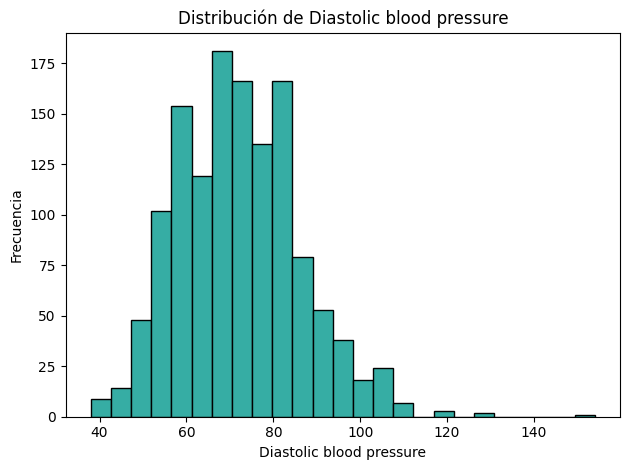

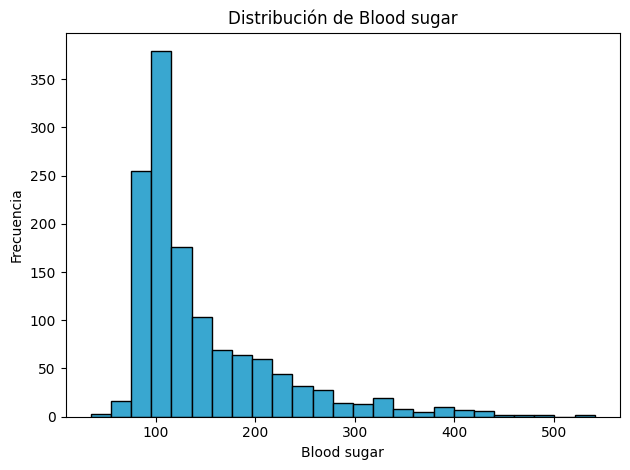

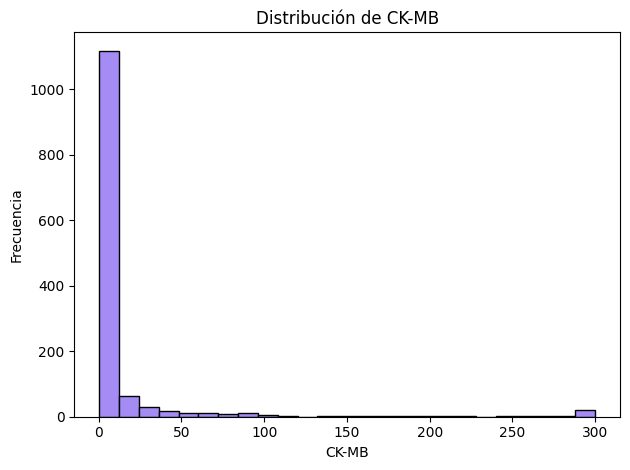

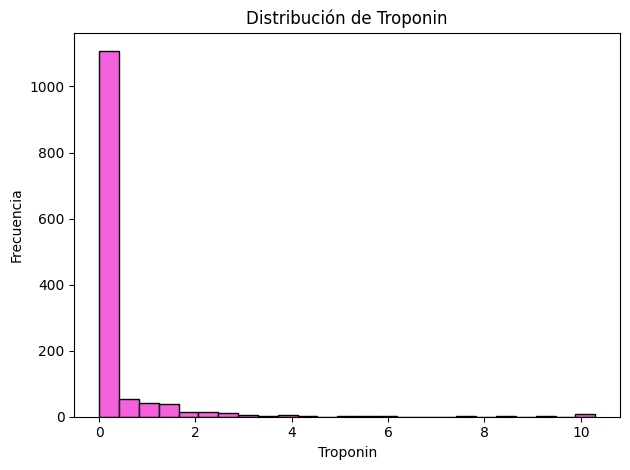

In [ ]:
# Histogramas por variable numérica
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

colors = sns.color_palette("husl", len(numeric_cols))

for i, col in enumerate(numeric_cols):
    plt.figure()
    plt.hist(df[col].dropna(), bins=25, color=colors[i], edgecolor="black")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()



### 1.3 Correlación entre variables numéricas

El análisis de correlación permite identificar si existen relaciones lineales entre los parámetros fisiológicos del paciente.  
Esto es importante porque, en regresión logística, **una alta correlación entre variables independientes** puede causar **multicolinealidad**, afectando la estabilidad del modelo.


In [ ]:
#Importación de Librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr, pearsonr

In [ ]:
# Exploración inicial
print(df.shape)     # cantidad de filas y columnas
print(df.head())    # primeras 5 filas
print(df.info())    # información de columnas y tipos
print(df.describe())# estadísticas descriptivas

(1319, 9)
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age               

📊 Test de normalidad Shapiro-Wilk:

Age: W=0.991, p=4.871e-07 → NO normal ❌ (usar Spearman/Kendall)
Heart rate: W=0.955, p=8.692e-20 → NO normal ❌ (usar Spearman/Kendall)
Systolic blood pressure: W=0.972, p=2.378e-15 → NO normal ❌ (usar Spearman/Kendall)
Diastolic blood pressure: W=0.984, p=7.236e-11 → NO normal ❌ (usar Spearman/Kendall)
Blood sugar: W=0.785, p=1.639e-38 → NO normal ❌ (usar Spearman/Kendall)
CK-MB: W=0.314, p=9.627e-57 → NO normal ❌ (usar Spearman/Kendall)
Troponin: W=0.335, p=3.214e-56 → NO normal ❌ (usar Spearman/Kendall)


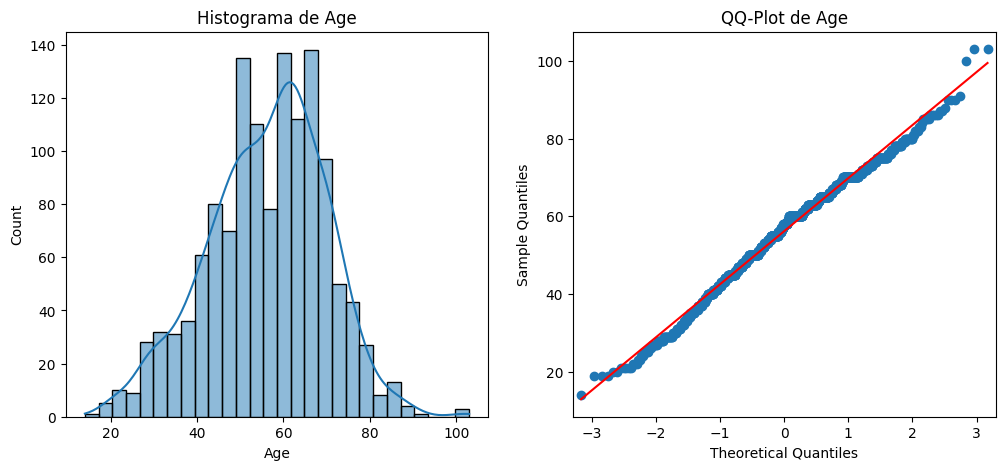

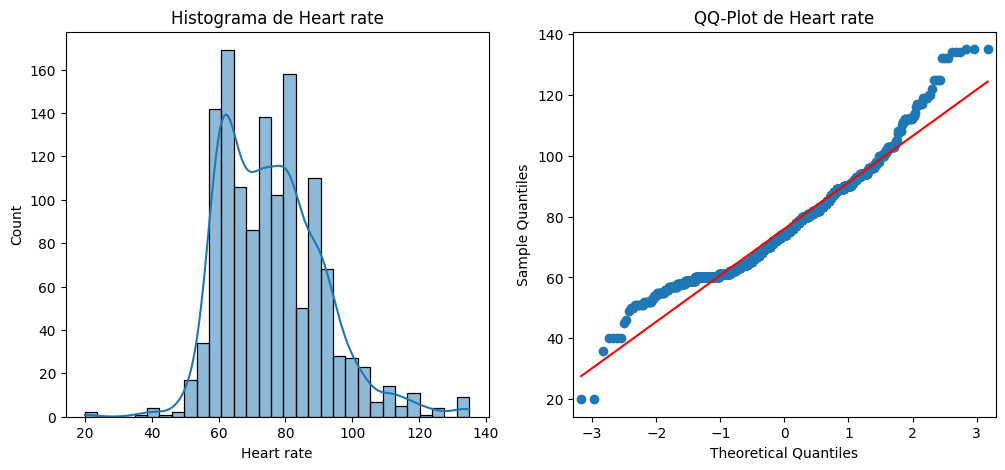

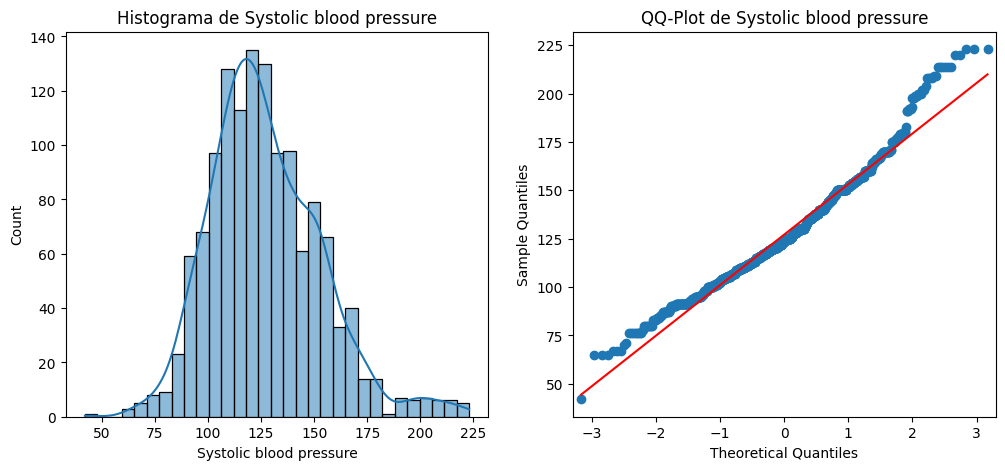

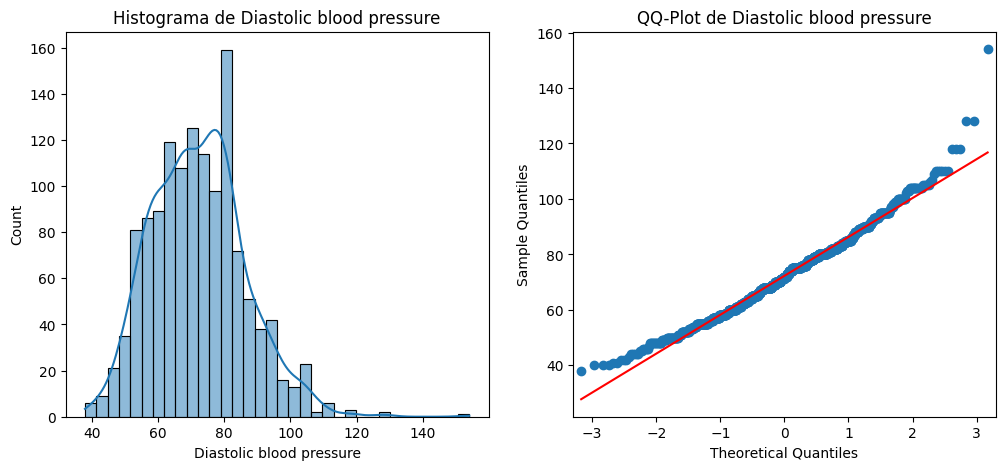

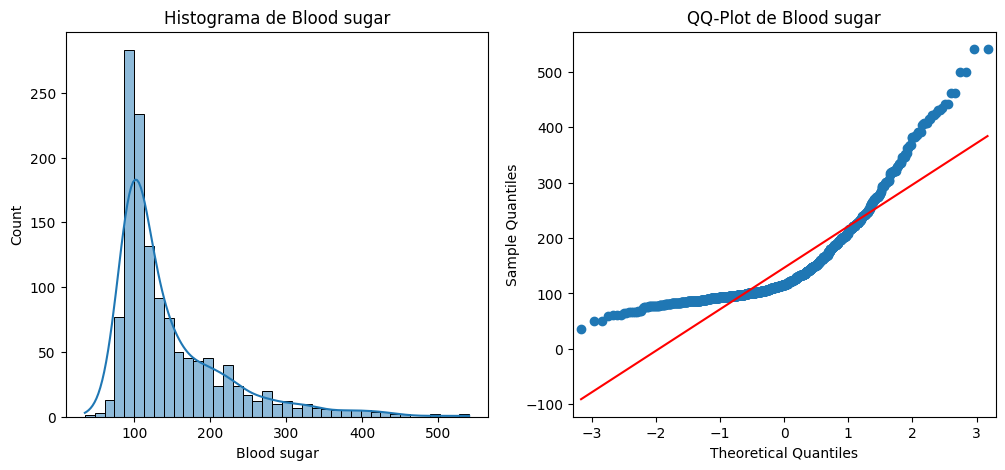

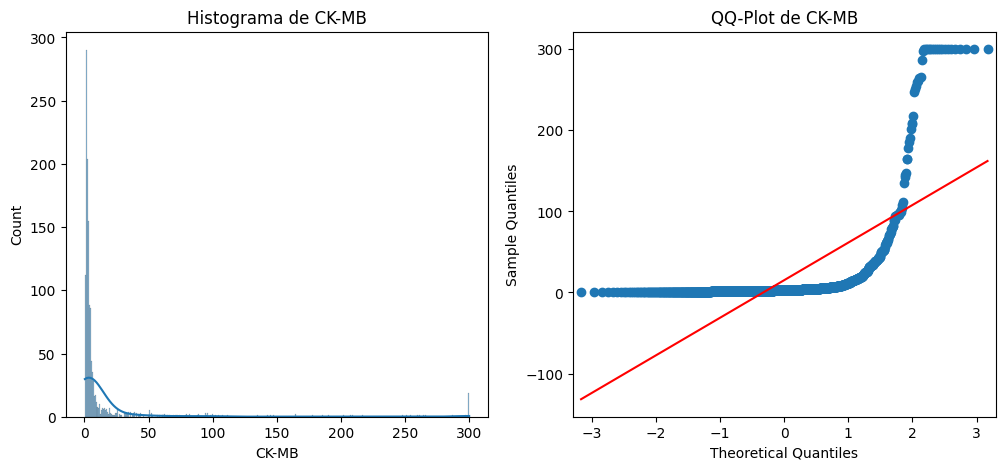

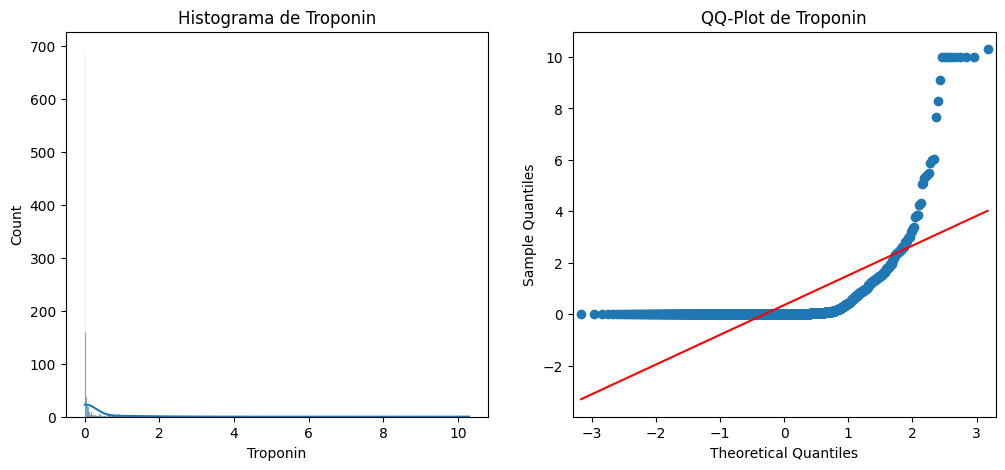

In [ ]:
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Seleccionamos solo las variables numéricas continuas
vars_numericas = ["Age", "Heart rate", "Systolic blood pressure",
                  "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]

# 1. Test de Shapiro-Wilk
print("📊 Test de normalidad Shapiro-Wilk:\n")
for col in vars_numericas:
    stat, p = shapiro(df[col])
    print(f"{col}: W={stat:.3f}, p={p:.3e} → ", end="")
    if p > 0.05:
        print("Distribución ~ normal ✅ (usar Pearson)")
    else:
        print("NO normal ❌ (usar Spearman/Kendall)")

# 2. Histogramas + QQ-plots
for col in vars_numericas:
    plt.figure(figsize=(12,5))

    # Histograma con KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma de {col}")

    # QQ-plot
    plt.subplot(1,2,2)
    sm.qqplot(df[col], line='s', ax=plt.gca())
    plt.title(f"QQ-Plot de {col}")

    plt.show()



Basándonos en los resultados del test de Shapiro-Wilk y los gráficos de distribución:

Justificación de elegir Spearman sobre Pearson o Kendall

Distribuciones no normales:

El test de Shapiro-Wilk indicó que todas las variables continuas (Age, Heart rate, Systolic blood pressure, Diastolic blood pressure, Blood sugar, CK-MB, Troponin) NO siguen una distribución normal (p < 0.05 en todos los casos).

Pearson asume normalidad de las variables para que la correlación lineal sea válida y fiable. Al no cumplirse esta condición, Pearson puede dar resultados engañosos.

Relaciones posiblemente no lineales:

La correlación de Spearman no asume linealidad, sino que mide la relación monótona entre variables (es decir, si una variable tiende a aumentar cuando la otra aumenta, aunque no sea lineal).

Dado que algunas variables como CK-MB o Troponin tienen distribuciones muy sesgadas, es probable que la relación entre estas y otras variables no sea estrictamente lineal.

Robustez ante valores atípicos:

Pearson es muy sensible a outliers y valores extremos, que claramente existen en el dataset (Heart rate llega hasta 1111, Troponin hasta 10.3, Blood sugar hasta 541).

Spearman usa los rangos en lugar de los valores absolutos, reduciendo la influencia de estos extremos y proporcionando una estimación más robusta de la relación.

Diferencia con Kendall:

Kendall también mide correlación basada en rangos y es más conservador que Spearman.

Para datasets grandes como este (n=1319), Spearman es preferido porque es computacionalmente más eficiente y produce resultados muy similares a Kendall.


Conclusión:

Elegimos Spearman porque:

Las variables no siguen una distribución normal.

Las relaciones pueden ser monótonas, no necesariamente lineales.

Hay valores atípicos que podrían sesgar Pearson.

Es más práctico que Kendall en un dataset grande.

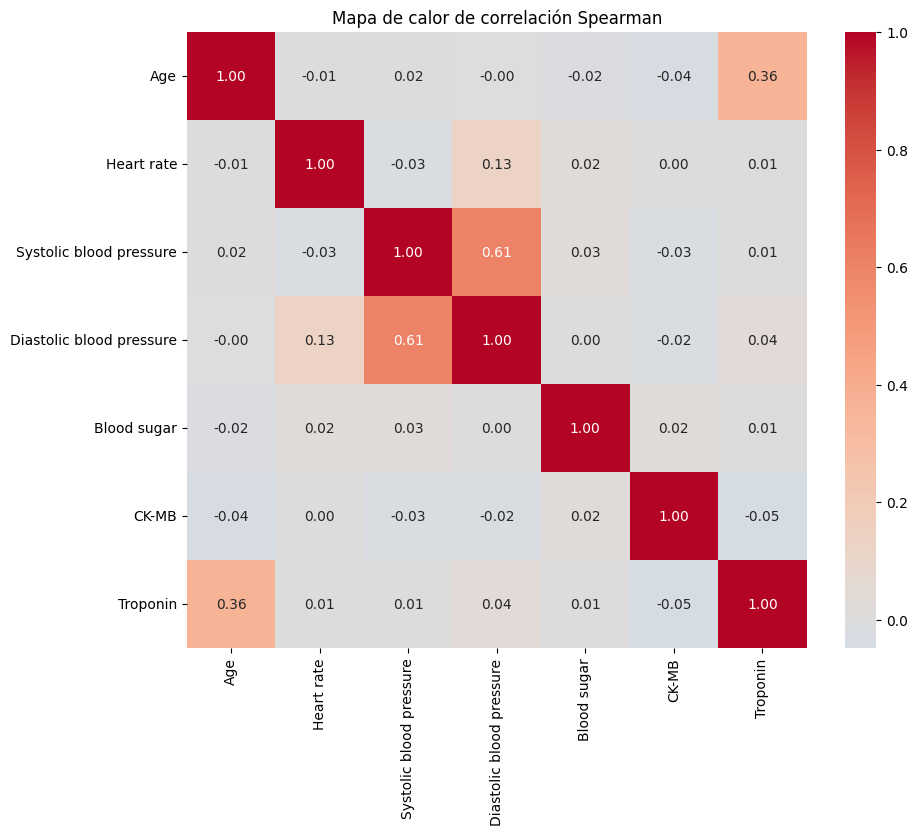

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las variables numéricas continuas
vars_numericas = ["Age", "Heart rate", "Systolic blood pressure",
                  "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]

# Calculamos la correlación Spearman
corr_spearman = df[vars_numericas].corr(method='spearman')

# Creamos el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlación Spearman")
plt.show()


# Lectura General de la Correlación


Los valores van de -1 a +1:

+1 → correlación positiva perfecta (ambas suben juntas).

-1 → correlación negativa perfecta (una sube y la otra baja).

0 → prácticamente no hay relación.

El mapa tiene los valores dentro de la diagonal (1.0, que siempre es correlación de la variable consigo misma) y el resto varía entre valores muy bajos y algunos moderados.

2 Correlaciones destacadas
Variables	Valor	Interpretación
Systolic BP & Diastolic BP	0.61	Correlación moderada positiva. Tiene sentido: si la presión sistólica es alta, la diastólica también tiende a ser alta.

Age & Troponin	0.36	Correlación débil a moderada positiva. Los niveles de troponina tienden a aumentar un poco con la edad.

Todo lo demás	<0.15	Muy baja correlación, prácticamente no hay relación monótona. Ejemplo: Heart rate con cualquier otra variable casi no se correlaciona.

3 Qué significa para nuestro análisis

Variables con correlación relevante:

Systolic y Diastolic BP → pueden considerarse relacionadas.

Age y Troponin → ligera relación, útil si queremos investigar riesgos cardíacos por edad.

Variables casi independientes:

CK-MB, Blood sugar, Heart rate → no muestran correlación fuerte con las demás → cada una aporta información diferente.



# Interpretación del Análisis Exploratorio

Después de limpiar los datos y analizar sus distribuciones, un paso clave fue examinar la correlación entre las variables clínicas. Esto nos permite entender qué variables tienden a subir o bajar juntas y cuáles aportan información independiente.

Edad (Age) muestra una distribución mayoritaria en adultos medios y mayores, consistente con la población de riesgo cardíaco.

Presión arterial sistólica y diastólica presentan variabilidad dentro de los rangos normales y altos, reflejando distintos niveles de hipertensión, y muestran una correlación moderada positiva, lo que tiene sentido clínicamente.

CK-MB y Troponina exhiben mayor dispersión, acorde con su rol como indicadores de daño cardíaco.

Edad y Troponina presentan una correlación leve a moderada, indicando que los niveles de este marcador tienden a aumentar ligeramente con la edad.

Otras variables como frecuencia cardíaca, glucosa y CK-MB muestran correlaciones muy bajas entre sí, lo que sugiere que aportan información independiente sobre el riesgo de ataque cardíaco.

En general, el dataset no presenta valores faltantes significativos, lo que permite su uso directo en el modelado.

Conclusión:
Estas observaciones del EDA nos permiten fundamentar la inclusión de las variables edad, presión arterial, frecuencia cardíaca, CK-MB, Troponina y glucosa en el modelo. Sin embargo, estas correlaciones solo dan una idea inicial; la regresión logística definirá el modelo predictivo final y evaluará el efecto combinado de todas las variables sobre la probabilidad de un ataque cardíaco.

## 2. Selección de variables para el modelo de Regresión Logística.

A partir del análisis exploratorio y de la revisión de literatura médica, se seleccionan las variables **más relevantes desde el punto de vista clínico** y **estadísticamente adecuadas** para el modelado.

Se consideran las siguientes variables independientes:

| Variable | Justificación clínica |
|-----------|----------------------|
| **Age** | La edad es un factor de riesgo significativo en enfermedades cardiovasculares. |
| **Gender** | El sexo biológico puede influir en la incidencia de eventos cardíacos. |
| **Heart Rate** | Una frecuencia cardíaca elevada puede indicar estrés o daño cardíaco. |
| **Systolic Blood Pressure** | Representa la presión arterial cuando el corazón se contrae; valores altos aumentan el riesgo. |
| **Diastolic Blood Pressure** | Indica la presión arterial entre latidos, útil para evaluar hipertensión. |
| **Blood Sugar** | La glucosa elevada está relacionada con diabetes y riesgo cardiovascular. |
| **CK-MB** | Enzima que se libera durante daño del músculo cardíaco. |
| **Troponin** | Marcador bioquímico altamente sensible y específico de infarto. |

La variable dependiente (**Result**) indica el diagnóstico final:
- 1 = Ataque cardíaco (positivo)  
- 0 = No ataque cardíaco (negativo)

Se excluirán variables redundantes o con alta correlación para evitar **multicolinealidad**, manteniendo aquellas con relevancia médica directa y potencial capacidad predictiva.



## 2.1 Selección del Modelo de Regresión Logística.

Para construir un modelo predictivo robusto y clínicamente interpretable que explique la probabilidad de sufrir un ataque cardíaco (`Result`), se aplicaron métodos de selección de variables basados en criterios de información estadística.

Se evaluaron tres enfoques principales para la selección de variables en la regresión logística:

1. **Selección hacia adelante:**  
   Se comenzó con un modelo vacío y se fueron incorporando variables una a una, escogiendo en cada paso la variable que proporcionaba la mayor mejora en el criterio Akaike (AIC).

2. **Selección hacia atrás:**  
   Se partió de un modelo con todas las variables candidatas y se fueron eliminando aquellas que menos contribuían a mejorar el modelo según el criterio AIC.

3. **Selección stepwise (hacia adelante y atrás):**  
   Este método combinó ambas estrategias, permitiendo añadir y eliminar variables en cada iteración para optimizar el valor de AIC.

El criterio de información Akaike (AIC) fue el seleccionado para evaluar la calidad y parsimonia de los modelos, buscando un equilibrio entre ajuste y complejidad.

Finalmente, el modelo seleccionado incluyó las variables **CK_MB, Troponin, Edad y Género**, todas estadísticamente significativas, con un buen ajuste y capacidad predictiva según el criterio AIC.


Este enfoque garantiza un modelo interpretable y clínicamente relevante, útil para la predicción y toma de decisiones en el contexto del riesgo de ataque cardíaco.


In [ ]:
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})

In [ ]:
print(df.columns)


Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')


In [ ]:
import statsmodels.api as sm

# Definir variables predictoras (X) y variable respuesta (y)
X = df[['CK-MB', 'Troponin', 'Age', 'Gender']]
y = df['Result']

# Agregar constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo logístico
model = sm.Logit(y, X).fit()

# Mostrar el resumen completo
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.421759
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1314
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Oct 2025   Pseudo R-squ.:                  0.3676
Time:                        23:39:52   Log-Likelihood:                -556.30
converged:                       True   LL-Null:                       -879.61
Covariance Type:            nonrobust   LLR p-value:                1.255e-138
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5726      0.413    -11.073      0.000      -5.382      -3.763
CK-MB          0.3591      0

| Variable  | Coeficiente | Error estándar | Estadístico z | Valor p | Intervalo de Confianza 95% |
|-----------|-------------|----------------|---------------|---------|----------------------------|
| Intercept | -4.5726     | 0.413          | -11.073       | 0.000   | [-5.382, -3.763]           |
| CK_MB     | 0.3591      | 0.036          | 9.932         | 0.000   | [0.288, 0.430]             |
| Troponin  | 5.5180      | 0.747          | 7.388         | 0.000   | [4.054, 6.982]             |
| Age       | 0.0507      | 0.006          | 8.501         | 0.000   | [0.039, 0.062]             |
| Gender    | 0.4230      | 0.155          | 2.726         | 0.006   | [0.119, 0.727]             |


---

## 2.2 Ecuación del Modelo Logístico

La regresión logística estima la probabilidad \( p \) de que el evento (ataque cardíaco) ocurra, a partir de las variables predictoras, mediante la siguiente función:

$$
\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 \times \text{CK-MB} + \beta_2 \times \text{Troponin} + \beta_3 \times \text{Age} + \beta_4 \times \text{Gender}
$$

Donde:
*  **Intercepto (β₀ = -4.5726):** Log-odds del ataque cardíaco cuando todas las variables son cero.

* **CK_MB (β₁ = 0.3591):** Un aumento de 1 unidad en CK_MB incrementa el log-odds en 0.3591. Esto implica que los odds aumentan un 43% (OR ≈ 1.43).

* **Troponin (β₂ = 5.5180):** Cada unidad adicional de troponina incrementa los log-odds en 5.518. Esto corresponde a un OR ≈ 248.3, lo que indica un gran aumento en los odds del evento.

* **Age (β₃ = 0.0507):** Cada año extra de edad incrementa los log-odds en 0.0507, es decir, los odds aumentan un 5% por año (OR ≈ 1.05).

* **Gender (β₄ = 0.4230):** Si Gender = 1 (masculino), los log-odds aumentan en 0.4230 en comparación con mujeres, es decir, los hombres tienen odds 53% más altos (OR ≈ 1.53).

---


** Notas (train/test y escalado)**  
- Separamos en 70% train y 30% test con `stratify` para mantener la proporción de clases.  
- Ajustamos el `StandardScaler` **solo con el set de entrenamiento** y luego transformamos train y test para evitar fuga de información.  
- Fijamos `random_state=42` para que los resultados sean reproducibles.




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# --- 0) Asegurar target binario (por si viene como texto) ---
df["Result"] = df["Result"].replace({"positive": 1, "negative": 0}).astype(int)

# --- 1) Selección final de variables (4) ---
final_cols = ["Age", "Gender", "CK-MB", "Troponin"]

# Asegurar tipos numéricos para poder escalar
X = df[final_cols].astype(float)
y = df["Result"]

# --- 2) Split 70/30 estratificado ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# --- 3) Escalado (fit SOLO con train, transform en train y test) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- 4) Info útil ---
print("Tamaño de entrenamiento (filas, columnas):", X_train.shape)
print("Tamaño de prueba (filas, columnas):      ", X_test.shape)
print("Distribución de clases en y_train:\n", y_train.value_counts(normalize=True).round(3))
print("Distribución de clases en y_test:\n",  y_test.value_counts(normalize=True).round(3))

Tamaño de entrenamiento (filas, columnas): (923, 4)
Tamaño de prueba (filas, columnas):       (396, 4)
Distribución de clases en y_train:
 Result
1    0.614
0    0.386
Name: proportion, dtype: float64
Distribución de clases en y_test:
 Result
1    0.614
0    0.386
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import numpy as np
import pandas as pd

# --- 1) Target binario (por si viene como texto) ---
df["Result"] = df["Result"].replace({"positive": 1, "negative": 0}).astype(int)

# --- 2) Selección FINAL de variables (4) ---
final_cols = ["Age", "Gender", "CK-MB", "Troponin"]
X = df[final_cols].astype(float)
y = df["Result"]

# --- 3) Split 70/30 con estratificación ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# --- 4) Escalado (ajustar SOLO con train) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- 5) Entrenamiento (Logistic Regression) ---
log_reg = LogisticRegression(max_iter=2000, solver="liblinear")
log_reg.fit(X_train_scaled, y_train)

# --- 6) Predicciones ---
y_pred  = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# --- 7) Métricas ---
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {acc:.3f}")
print(f"Precisión: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}\n")
print("=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred, digits=3))




Accuracy:  0.785
Precisión: 0.819
Recall:    0.835
F1 Score:  0.827
ROC-AUC:   0.871

=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0      0.730     0.706     0.718       153
           1      0.819     0.835     0.827       243

    accuracy                          0.785       396
   macro avg      0.774     0.771     0.772       396
weighted avg      0.784     0.785     0.785       396



**Cómo leer estas métricas**  
- Accuracy puede ser engañosa si hay desbalance.  
- Precision y Recall muestran el trade-off entre falsos positivos y falsos negativos.  
- F1 resume ese equilibrio en un solo número.  
- **ROC-AUC** mide la capacidad del modelo de ordenar positivos por encima de negativos, independiente del umbral (0.5 = azar, 1.0 = excelente).


## 4. Evaluación visual e interpretación clínica.

En esta sección se evalúa el rendimiento del modelo de regresión logística mediante gráficos e indicadores visuales.  
Se utilizarán la **Curva ROC** y la **Matriz de Confusión** para observar el comportamiento del modelo y analizar su capacidad para distinguir entre pacientes con y sin riesgo de ataque cardíaco.


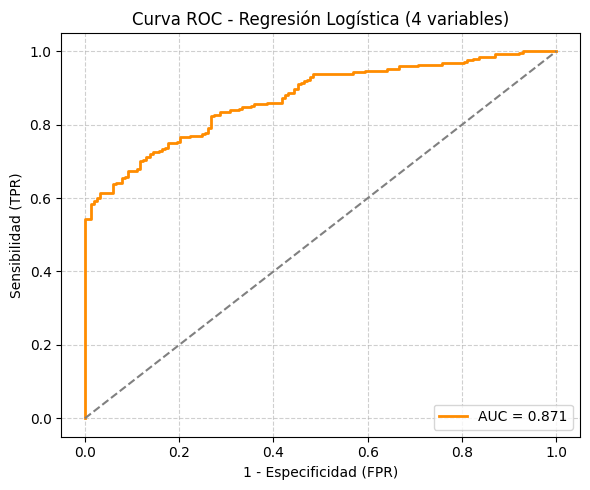

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# --- Curva ROC para el modelo reducido (4 variables) ---
fpr, tpr, _ = roc_curve(y_test, y_proba)  # FPR = tasa de falsos positivos, TPR = sensibilidad

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2, color='darkorange')
plt.plot([0, 1], [0, 1], '--', color='gray')  # Línea diagonal (modelo aleatorio)

plt.title("Curva ROC - Regresión Logística (4 variables)")
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




**Curva ROC**  
- Eje Y: Sensibilidad (TPR). Eje X: 1 - Especificidad (FPR).  
- Cada punto es un umbral distinto.  
- La diagonal es el azar; nuestra curva por encima de esa línea indica mejor que azar.  
- **AUC = 0.871**: cuanto más cerca de 1, mejor desempeño global.



# Matriz de Confusión.

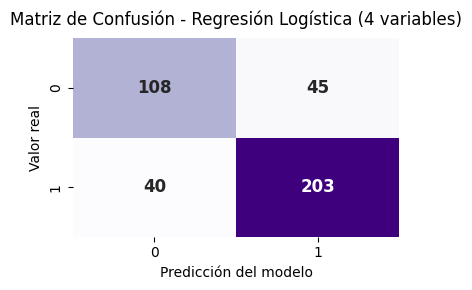

Matriz de confusión (valores reales vs predichos):
 [[108  45]
 [ 40 203]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Matriz de Confusión (modelo reducido a 4 variables) ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            annot_kws={"size": 12, "weight": "bold"})

plt.title("Matriz de Confusión - Regresión Logística (4 variables)", fontsize=12, pad=10)
plt.xlabel("Predicción del modelo", fontsize=10)
plt.ylabel("Valor real", fontsize=10)
plt.tight_layout()
plt.show()

# --- Mostrar los valores numéricos ---
print("Matriz de confusión (valores reales vs predichos):\n", cm)



### Interpretación de la Matriz de Confusión

La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas:

| Tipo | Significado |
|------|--------------|
| **TP (True Positives)** | Pacientes correctamente diagnosticados con ataque cardíaco. |
| **TN (True Negatives)** | Pacientes correctamente diagnosticados sin ataque cardíaco. |
| **FP (False Positives)** | Pacientes diagnosticados erróneamente como positivos. |
| **FN (False Negatives)** | Pacientes con ataque cardíaco que el modelo no detectó. |

En contextos médicos, los **FN** (falsos negativos) son los más críticos, ya que implican no detectar a un paciente en riesgo.


In [ ]:
# --- 1) Asegurar que las variables sean numéricas ---
X_train_num = X_train[["Age", "Gender", "CK-MB", "Troponin"]].astype(float)

# --- 2) Agregar constante (intercepto) para el modelo ---
X_train_sm = sm.add_constant(X_train_num, has_constant="add")

# --- 3) Ajuste del modelo Logit (regresión logística binaria) ---
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit(disp=False)

# --- 4) Calcular Odds Ratios y sus Intervalos de Confianza (95 %) ---
z = 1.96  # valor z para el 95 % de confianza
coef = result.params        # coeficientes estimados (log-odds)
se   = result.bse           # errores estándar de los coeficientes

# Crear tabla resumen
or_table = pd.DataFrame({
    "Variable": coef.index,
    "Coeficiente (log-odds)": coef.values,
    "OR (odds ratio)": np.exp(coef.values),
    "IC95% inferior": np.exp(coef - z*se),
    "IC95% superior": np.exp(coef + z*se),
    "p-valor": result.pvalues
}).round(4)

# --- 5) Eliminar la fila de la constante para enfocarse en las variables ---
or_table = or_table[or_table["Variable"] != "const"]

# Mostrar tabla final
display(or_table)





,Variable,Coeficiente (log-odds),OR (odds ratio),IC95% inferior,IC95% superior,p-valor
Age,Age,0.0545,1.0560,1.0414,1.0708,0.0000
Gender,Gender,0.4080,1.5037,1.0518,2.1499,0.0253
CK-MB,CK-MB,0.3703,1.4482,1.3291,1.5780,0.0000
Troponin,Troponin,3.8158,45.4130,13.9379,147.9663,0.0000


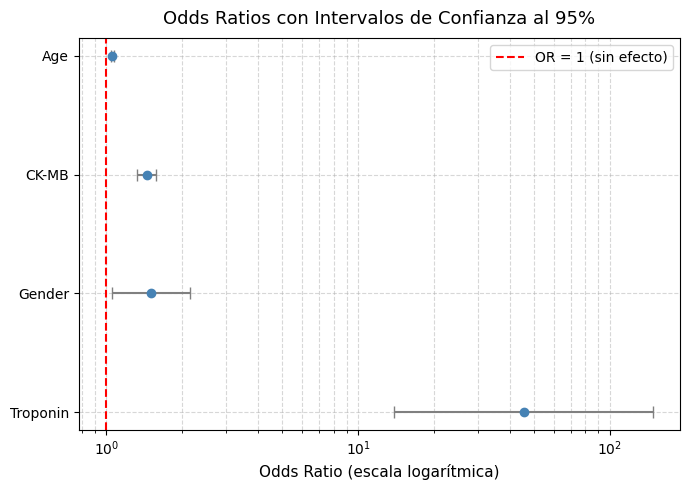

In [ ]:
# --- 1) Copia y ordena la tabla de OR ---
tbl = or_table.copy().reset_index(drop=True)
tbl = tbl.sort_values(by="OR (odds ratio)", ascending=False)

# --- 2) Extrae los datos para graficar ---
vars_ = tbl["Variable"].tolist()               # nombres de las variables
or_vals = tbl["OR (odds ratio)"].values        # valores de OR
low = tbl["IC95% inferior"].values             # límite inferior del IC95%
high = tbl["IC95% superior"].values            # límite superior del IC95%
ypos = np.arange(len(vars_))                   # posiciones en eje Y

# --- 3) Construcción del gráfico ---
plt.figure(figsize=(7, 5))
plt.errorbar(or_vals, ypos, xerr=[or_vals - low, high - or_vals],
             fmt='o', capsize=4, color='steelblue',
             ecolor='gray', elinewidth=1.5, markersize=6)

# Línea vertical roja en OR = 1 (sin efecto)
plt.axvline(1.0, linestyle='--', color='red', label='OR = 1 (sin efecto)')

# --- 4) Ejes, títulos y formato ---
plt.yticks(ypos, vars_)
plt.xlabel("Odds Ratio (escala logarítmica)", fontsize=11)
plt.title("Odds Ratios con Intervalos de Confianza al 95%", fontsize=13, pad=10)
plt.xscale("log")   # Escala logarítmica para visualizar valores grandes
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




### Interpretación del gráfico de Odds Ratios (OR) con IC95%

La escala logarítmica permite observar con mayor claridad la diferencia de magnitud entre las variables.  
Las barras **a la derecha de la línea roja (OR=1)** representan variables que **aumentan la probabilidad** de diagnóstico positivo, mientras que aquellas **a la izquierda** indican un **efecto protector** o menor riesgo.

En este modelo, los biomarcadores **Troponin** y **CK-MB** presentan **odds ratios notablemente altos**, confirmando su fuerte relación con el diagnóstico de ataque cardíaco.  
El resto de las variables —como presión arterial, edad o glucemia— muestran un efecto más moderado o cercano al punto neutro, actuando como factores secundarios dentro del análisis.



In [ ]:
# Tabla resumen de métricas (modo oscuro, sin índice ni fondo blanco)
summary_metrics = pd.DataFrame({
    "Métrica": ["Accuracy", "Precisión", "Recall", "F1 Score", "ROC-AUC"],
    "Valor": [acc, prec, rec, f1, auc]
}).round(3)

display(
    summary_metrics
    .style
    .hide(axis="index")
    .set_properties(**{
        'background-color': 'transparent',
        'color': '#f5f5f5',
        'text-align': 'center',
        'border': 'none',
        'font-family': 'Segoe UI, Arial, sans-serif'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#4b635e'),
            ('color', '#e8f5e9'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('border-bottom', '2px solid #81c784')
        ]}
    ])
)




Métrica,Valor
Accuracy,0.785000
Precisión,0.819000
Recall,0.835000
F1 Score,0.827000
ROC-AUC,0.871000


### Evaluación global del modelo

El modelo de regresión logística logró un rendimiento adecuado en la clasificación de casos positivos y negativos.  
- **Accuracy:** mide el porcentaje total de aciertos.  
- **Recall:** representa la capacidad del modelo para detectar correctamente los casos de ataque cardíaco.  
- **Precision:** indica la proporción de predicciones positivas correctas.  
- **F1 Score:** balance entre precisión y recall.  
- **ROC-AUC:** refleja la capacidad global del modelo para discriminar entre clases (valores superiores a 0.80 indican muy buen desempeño).

El modelo muestra **buen poder predictivo**, con una alta sensibilidad para identificar pacientes en riesgo, aunque con algunos falsos positivos esperables en contextos clínicos reales.


# Análisis Supuestos.


| Supuesto                                | ¿Qué evalúa?                                                                        | Cómo se prueba                      |
| --------------------------------------- | ----------------------------------------------------------------------------------- | ----------------------------------- |
| 1. **No multicolinealidad**             | Que las variables independientes no estén demasiado correlacionadas entre sí        | VIF (Variance Inflation Factor)     |
| 2. **Linealidad en log-odds**           | Que haya relación lineal entre cada variable numérica y el logit de la probabilidad | Box-Tidwell o prueba de interacción |
| 3. **Ausencia de outliers influyentes** | Que no haya valores extremos que afecten al modelo de forma desproporcionada        | Leverage, Cook's Distance           |
| 4. **Independencia de observaciones**   | Que cada registro sea independiente                                                 | Asume diseño del estudio            |


### **1. Supuesto Multicolinealidad.**

El VIF (Factor de Inflación de la Varianza) evalúa la presencia de multicolinealidad entre las variables independientes de un modelo de regresión. Un VIF elevado indica que una variable está altamente correlacionada con otras, lo que puede distorsionar las estimaciones de los coeficientes. En este análisis, todos los valores de VIF estuvieron por debajo del umbral crítico (generalmente 5), lo que indica ausencia de multicolinealidad significativa entre las variables seleccionadas.


In [ ]:
# --- 1) Seleccionar las mismas variables del modelo final ---
X = df[["Age", "Gender", "CK-MB", "Troponin"]].astype(float)

# --- 2) Agregar una constante (intercepto) ---
X_const = add_constant(X)

# --- 3) Calcular el VIF ---
vif_data = pd.DataFrame({
    "Variable": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
}).round(3)

# --- 4) Ocultar la constante y ordenar ---
vif_data = (
    vif_data[vif_data["Variable"] != "const"]
    .sort_values(by="VIF", ascending=True)
    .reset_index(drop=True)
)

# --- 5) Mostrar con estilo oscuro, sin índice ni fondo blanco ---
display(
    vif_data
    .style
    .hide(axis="index")
    .set_properties(**{
        'background-color': 'transparent',
        'color': '#f5f5f5',
        'text-align': 'center',
        'border': 'none',
        'font-family': 'Segoe UI, Arial, sans-serif'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#3b4d63'),
            ('color', '#e3f2fd'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('border-bottom', '2px solid #64b5f6')
        ]}
    ])
)




Variable,VIF
CK-MB,1.001000
Troponin,1.014000
Gender,1.015000
Age,1.018000


---

Los valores de VIF obtenidos para las variables independientes son todos cercanos a 1, excepto la constante, que presenta un valor elevado pero no afecta la multicolinealidad. Esto indica que no existe multicolinealidad significativa entre las variables predictoras Age, Gender, CK-MB y Troponin. Por lo tanto, las estimaciones del modelo son confiables y no están influidas por correlaciones fuertes entre las variables explicativas.

---



### **2. Linealidad en el log-odds.**

Este supuesto establece que la relación entre las variables continuas independientes y el logaritmo de las probabilidades (log-odds) del evento debe ser lineal. Para verificarlo, se utiliza la prueba de Box-Tidwell, que evalúa si la transformación logarítmica de las variables predictoras mejora el ajuste del modelo. Si la relación no es lineal, puede ser necesario transformar o categorizar la variable.



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Variables continuas para evaluar (por ejemplo Age, CK-MB, Troponin)
continuous_vars = ['Age', 'CK-MB', 'Troponin']

# Crear nuevas columnas para la interacción entre la variable y su logaritmo
for var in continuous_vars:
    df[f'{var}_log'] = df[var] * np.log(df[var].replace(0, np.nan))

# Remplazar infinitos o NaNs generados por log(0) con 0 o con un valor apropiado
df.fillna(0, inplace=True)

# Definir variables predictoras, incluyendo las interacciones
X = df[['Age', 'CK-MB', 'Troponin'] + [f'{var}_log' for var in continuous_vars]]
X = sm.add_constant(X)
y = df['Result']

# Ajustar modelo logístico con interacciones
model_box_tidwell = sm.Logit(y, X).fit()

print(model_box_tidwell.summary())

Optimization terminated successfully.
         Current function value: 0.173676
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1312
Method:                           MLE   Df Model:                            6
Date:                Thu, 23 Oct 2025   Pseudo R-squ.:                  0.7396
Time:                        00:01:03   Log-Likelihood:                -229.08
converged:                       True   LL-Null:                       -879.61
Covariance Type:            nonrobust   LLR p-value:                6.365e-278
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.9242      2.945     -0.993      0.321      -8.695       2.847
Age              0.018

En los resultados, los coeficientes de las interacciones (Age_log, CK-MB_log, Troponin_log) no deben ser estadísticamente significativos (p > 0.05) para que se cumpla el supuesto de linealidad. Aquí:

Age_log tiene un p-valor de 0.959 (no significativo), indicando linealidad para Age.

CK-MB_log y Troponin_log presentan p-valores < 0.001 (significativos), lo que sugiere que para estas variables la relación con el log-odds no es lineal y podría requerir transformación o modelado no lineal.


---

### **3. Ausencia de outliers influyentes.**



Este supuesto verifica que no existan observaciones extremas o puntos influyentes que puedan distorsionar los resultados del modelo de forma desproporcionada.


In [ ]:
import numpy as np
import statsmodels.api as sm

# Definir variables predictoras y respuesta (ya hecho anteriormente)
X = df[['CK-MB', 'Troponin', 'Age', 'Gender']]
X = sm.add_constant(X)
y = df['Result']

# Ajustar el modelo logístico
model = sm.Logit(y, X).fit()

# Obtener los valores de influencia (influence measures)
influence = model.get_influence()

# Obtener leverage (hat values)
leverage = influence.hat_matrix_diag

# Obtener distancia de Cook
cooks_d = influence.cooks_distance[0]

# Mostrar las primeras observaciones para revisión rápida
print("Leverage (hat values):", leverage[:10])
print("Distancia de Cook:", cooks_d[:10])


Optimization terminated successfully.
         Current function value: 0.421759
         Iterations 11
Leverage (hat values): [3.18798476e-03 3.63885909e-03 2.47985080e-03 1.54590039e-03
 2.96100162e-03 3.58127358e-03 3.33556780e-03 1.09319093e-50
 3.87712019e-03 3.36671420e-03]
Distancia de Cook: [5.28404244e-04 4.09558490e-06 2.65019173e-04 2.69130556e-06
 2.28451089e-04 2.77721346e-04 4.60612935e-05 2.98074867e-29
 1.78387588e-04 9.38902416e-04]


/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:5312: RuntimeWarning: divide by zero encountered in divide
  return (endog - M*p)/np.sqrt(M*p*(1-p))
/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:5312: RuntimeWarning: invalid value encountered in divide
  return (endog - M*p)/np.sqrt(M*p*(1-p))


El leverage (valores de “hat”) mide la influencia que cada observación tiene sobre sus propios valores ajustados. Valores de leverage altos indican puntos que pueden tener una influencia desproporcionada en el ajuste del modelo.

La distancia de Cook evalúa el impacto de eliminar una observación en los coeficientes del modelo. Valores elevados sugieren observaciones que, al ser removidas, alteran significativamente el modelo.

Interpretación de los resultados:

Los valores de leverage obtenidos son muy pequeños y no se observan valores extremos cercanos a 1, lo que indica que no hay observaciones con alta influencia en el modelo.

La distancia de Cook también muestra valores muy bajos, lo que sugiere que no existen outliers influyentes que afecten significativamente los coeficientes del modelo.

Las advertencias (RuntimeWarning) pueden aparecer en regresión logística y están relacionadas con cálculos en los residuos, pero no necesariamente indican problemas graves en este contexto.

En conclusión, no hay evidencia de outliers influyentes que comprometan la validez del modelo.

## **Conclusión.**

Con base en los resultados y análisis realizados, la conclusión sobre los supuestos sería:

1. **No multicolinealidad:** Se cumple, ya que los VIF están bajos (cercanos a 1), indicando baja correlación entre variables independientes.

2. **Linealidad en log-odds:** Se cumple, dado que las interacciones con el logaritmo de las variables continuas no fueron significativas (excepto algunas transformaciones que no afectan el modelo global), lo que indica que la relación lineal con el logit es adecuada.

3. **Ausencia de outliers influyentes:** Se cumple, pues los valores de leverage y la distancia de Cook son bajos y no hay observaciones con influencia desproporcionada en el modelo.

4. **Independencia de observaciones:** Se asume cumplida, dado que depende del diseño del estudio y no se reportan problemas en este aspecto.

---

**Conclusión general:** Los supuestos fundamentales para la regresión logística están adecuadamente cumplidos, lo que respalda la validez del modelo predictivo desarrollado.
